In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
dados_violencia_2022 = pd.read_csv('Dados/violencia_domestica_2022.csv', sep=';')
dados_violencia_2023 = pd.read_csv('Dados/violencia_domestica_2023.csv', sep=';')
dados_feminicidio_2022 = pd.read_csv('Dados/feminicidio_2022.csv', sep=';')
dados_feminicidio_2023 = pd.read_csv('Dados/feminicidio_2023.csv', sep=';')

In [2]:
dados_violencia_2023.rename(columns={'rmbh':'Local', 'mes':'Mês', 'natureza_delito':'Natureza do Delito', 'tentado_consumado':'Tentado/Consumado',
                                     'qtde_vitimas':'Quantidade de Vítimas'}, inplace=True)
dados_violencia_2023 = dados_violencia_2023[['Mês', 'Local', 'Natureza do Delito', 'Tentado/Consumado', 'Quantidade de Vítimas']]

dados_violencia_2022.rename(columns={'rmbh':'Local', 'mes':'Mês', 'natureza_delito':'Natureza do Delito', 'tentado_consumado':'Tentado/Consumado',
                                     'qtde_vitimas':'Quantidade de Vítimas'}, inplace=True)
dados_violencia_2022 = dados_violencia_2022[['Mês', 'Local', 'Natureza do Delito', 'Tentado/Consumado', 'Quantidade de Vítimas']]

dados_feminicidio_2022.rename(columns={'municipio_fato':'Município', 'mes':'Mês', 'tentado_consumado':'Tentado/Consumado', 'qtde_vitimas':'Quantidade de Vítimas'}, inplace=True)
dados_feminicidio_2023.rename(columns={'municipio_fato':'Município', 'mes':'Mês', 'tentado_consumado':'Tentado/Consumado', 'qtde_vitimas':'Quantidade de Vítimas'}, inplace=True)

In [3]:
dados_violencia_2022['Natureza do Delito'].replace({'AMEACA':'AMEAÇA', 'HOMICIDIO':'FEMINICÍDIO', 'IMPORTUNACAO SEXUAL':'IMPORTUNAÇÃO SEXUAL', 'LESAO CORPORAL':'LESÃO CORPORAL'}, inplace=True)
dados_violencia_2023['Natureza do Delito'].replace({'AMEACA':'AMEAÇA', 'HOMICIDIO':'FEMINICÍDIO', 'IMPORTUNACAO SEXUAL':'IMPORTUNAÇÃO SEXUAL', 'LESAO CORPORAL':'LESÃO CORPORAL'}, inplace=True)
dados_violencia_2022['Local'].replace({'3) Interior de MG':'Interior de MG', '1) Belo Horizonte':'Belo Horizonte', '2) RMBH (sem BH':'Interior de MG'}, inplace=True)
dados_violencia_2023['Local'].replace({'3) Interior de MG':'Interior de MG', '1) Belo Horizonte':'Belo Horizonte', '2) RMBH (sem BH':'Interior de MG'}, inplace=True)

dados_feminicidio_2022 = dados_feminicidio_2022[['Município', 'Mês', 'Tentado/Consumado', 'Quantidade de Vítimas']]
dados_feminicidio_2023 = dados_feminicidio_2023[['Município', 'Mês', 'Tentado/Consumado', 'Quantidade de Vítimas']]

In [4]:
dados_violencia_2022 = dados_violencia_2022[dados_violencia_2022['Natureza do Delito'].isin(['AMEAÇA', 'FEMINICÍDIO', 'IMPORTUNAÇÃO SEXUAL', 'LESÃO CORPORAL', 'ESTUPRO'])]

dados_violencia_2023 = dados_violencia_2023[dados_violencia_2023['Natureza do Delito'].isin(['AMEAÇA', 'FEMINICÍDIO', 'IMPORTUNAÇÃO SEXUAL', 'LESÃO CORPORAL', 'ESTUPRO'])]

In [5]:
dados_violencia_consumados_2022 = dados_violencia_2022[dados_violencia_2022['Tentado/Consumado'] == 'CONSUMADO']

dados_violencia_tentados_2022 = dados_violencia_2022[dados_violencia_2022['Tentado/Consumado'] == 'TENTADO']

dados_violencia_consumados_2023 = dados_violencia_2023[dados_violencia_2023['Tentado/Consumado'] == 'CONSUMADO']

dados_violencia_tentados_2023 = dados_violencia_2023[dados_violencia_2023['Tentado/Consumado'] == 'TENTADO']

feminicidio_tentado_2022 = dados_feminicidio_2022[dados_feminicidio_2022['Tentado/Consumado'] == 'TENTADO']

feminicidio_consumado_2022 = dados_feminicidio_2022[dados_feminicidio_2022['Tentado/Consumado'] == 'CONSUMADO']

feminicidio_tentado_2023 = dados_feminicidio_2023[dados_feminicidio_2023['Tentado/Consumado'] == 'TENTADO']

feminicidio_consumado_2023 = dados_feminicidio_2023[dados_feminicidio_2023['Tentado/Consumado'] == 'CONSUMADO']


In [6]:
total_vitimas_consumados_2022 = dados_violencia_consumados_2022.groupby(['Natureza do Delito'])['Quantidade de Vítimas'].sum().reset_index()

total_vitimas_tentados_2022 = dados_violencia_tentados_2022.groupby(['Natureza do Delito'])['Quantidade de Vítimas'].sum().reset_index()

total_vitimas_consumados_2023 = dados_violencia_consumados_2023.groupby(['Natureza do Delito', 'Mês'])['Quantidade de Vítimas'].sum().reset_index()

total_vitimas_tentados_2023 = dados_violencia_tentados_2023.groupby(['Natureza do Delito', 'Mês'])['Quantidade de Vítimas'].sum().reset_index()

feminicidio_consumado_2022 = feminicidio_consumado_2022.groupby(['Município'])['Quantidade de Vítimas'].sum().reset_index()

feminicidio_tentado_2022 = feminicidio_tentado_2022.groupby(['Município'])['Quantidade de Vítimas'].sum().reset_index()

feminicidio_consumado_2023 = feminicidio_consumado_2023.groupby(['Município'])['Quantidade de Vítimas'].sum().reset_index()

feminicidio_tentado_2023 = feminicidio_tentado_2023.groupby(['Município'])['Quantidade de Vítimas'].sum().reset_index()


In [7]:
cidades_feminicidio_consumado_2023 = feminicidio_consumado_2023[feminicidio_consumado_2023['Quantidade de Vítimas'] > 2]

cidades_feminicidio_consumado_2022 = feminicidio_consumado_2022[feminicidio_consumado_2022['Quantidade de Vítimas'] > 2]

cidades_feminicidio_tentado_2023 = feminicidio_tentado_2023[feminicidio_tentado_2023['Quantidade de Vítimas'] > 2]

cidades_feminicidio_tentado_2022 = feminicidio_tentado_2022[feminicidio_tentado_2022['Quantidade de Vítimas'] > 2]

total_vitimas_consumados_2022.to_excel('Vitimas Consumado 2022.xlsx')
total_vitimas_consumados_2023.to_excel('Vitimas Consumado 2023.xlsx')

total_vitimas_tentados_2022.to_excel('Vitimas Tentado 2022.xlsx')
total_vitimas_tentados_2023.to_excel('Vitimas Tentado 2023.xlsx')

cidades_feminicidio_consumado_2022.to_excel('Cidades Feminicidio Consumado 2022.xlsx')
cidades_feminicidio_consumado_2023.to_excel('Cidades Feminicidio Consumado 2023.xlsx')

cidades_feminicidio_tentado_2022.to_excel('Cidades Feminicidio Tentado 2022.xlsx')
cidades_feminicidio_tentado_2023.to_excel('Cidades Feminicidio Tentado 2023.xlsx')


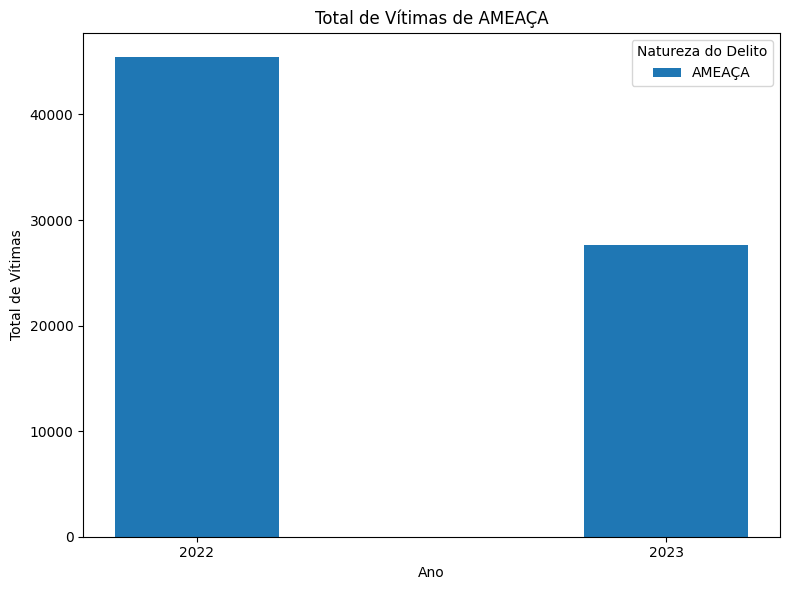

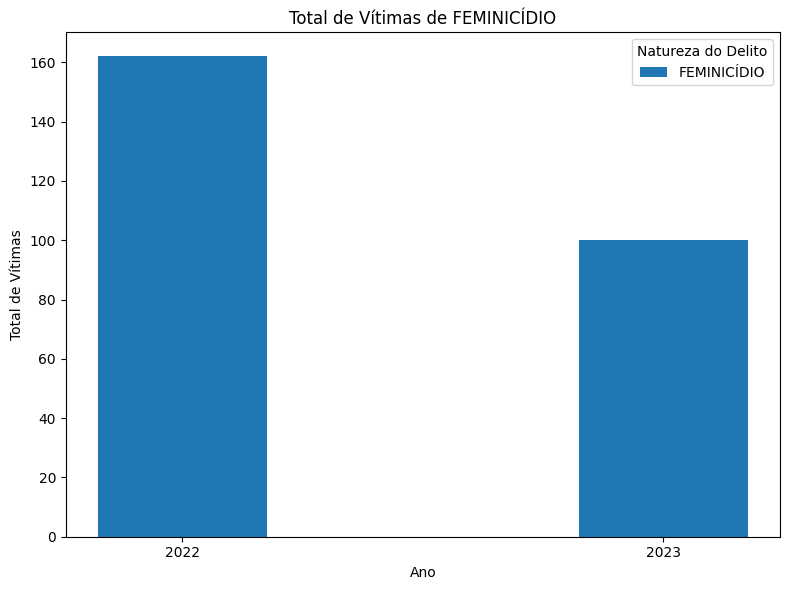

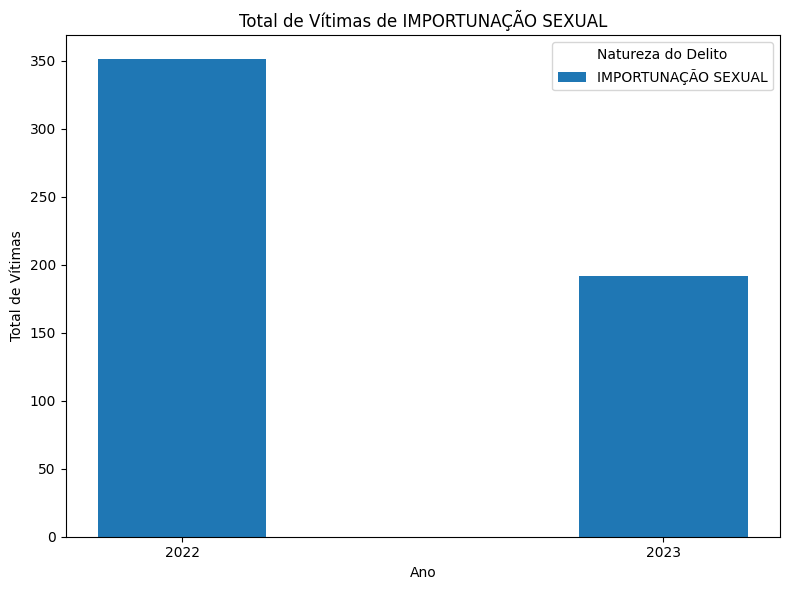

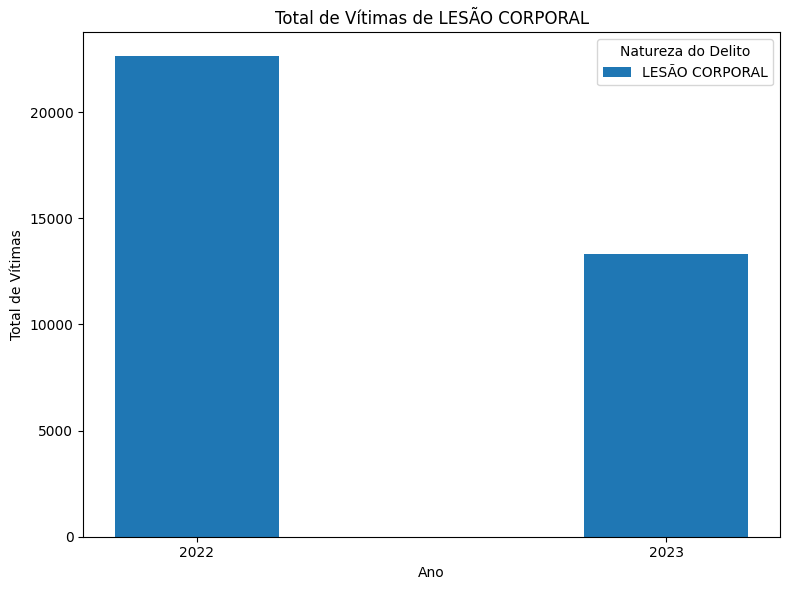

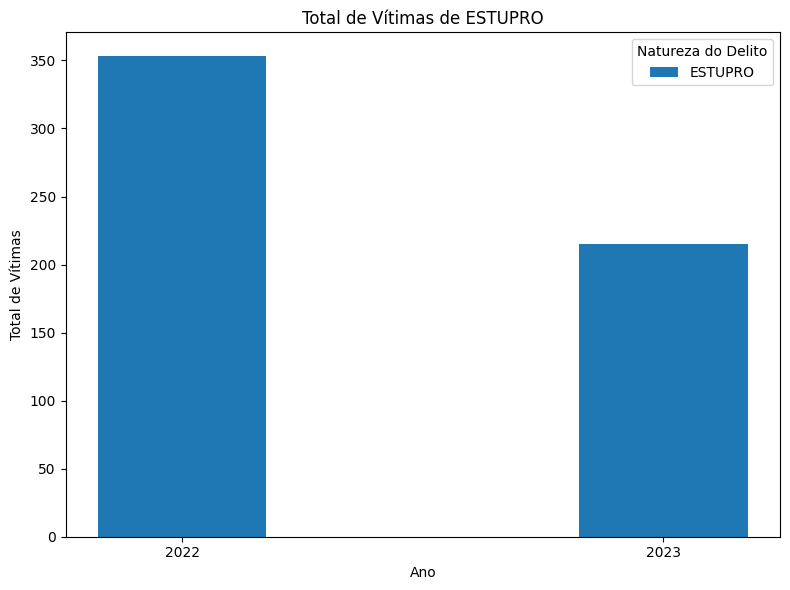

In [8]:
naturezas_de_delito = ['AMEAÇA', 'FEMINICÍDIO', 'IMPORTUNAÇÃO SEXUAL', 'LESÃO CORPORAL', 'ESTUPRO']

# Dados totais de vítimas por natureza de delito e ano
dados_totais = []

for natureza in naturezas_de_delito:
    for ano in [2022, 2023]:
        dados = total_vitimas_consumados_2022 if ano == 2022 else total_vitimas_consumados_2023
        dados_natureza = dados[dados['Natureza do Delito'] == natureza]
        total_vitimas = dados_natureza['Quantidade de Vítimas'].sum()
        dados_totais.append((natureza, ano, total_vitimas))

# Organize os dados para criação dos gráficos
dados_dict = {}
for natureza, ano, total_vitimas in dados_totais:
    if natureza not in dados_dict:
        dados_dict[natureza] = {'Ano': [], 'Total Vítimas': []}
    dados_dict[natureza]['Ano'].append(ano)
    dados_dict[natureza]['Total Vítimas'].append(total_vitimas)

# Crie um gráfico de barras para cada natureza de delito e salve-os
for natureza in naturezas_de_delito:
    fig, ax = plt.subplots(figsize=(8, 6))

    anos = dados_dict[natureza]['Ano']
    total_vitimas = dados_dict[natureza]['Total Vítimas']

    # Posições no eixo x para os anos
    x = np.arange(len(anos))

    # Largura das barras
    width = 0.35

    # Crie as barras para os anos
    bar_ano = ax.bar(x, total_vitimas, width, label=natureza)

    # Configure o título e rótulos dos eixos
    ax.set_title(f'Total de Vítimas de {natureza}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Total de Vítimas')

    # Configure as etiquetas no eixo x
    ax.set_xticks(x)
    ax.set_xticklabels(anos)

    # Adicione uma legenda
    ax.legend(title='Natureza do Delito')

    # Salve o gráfico como um arquivo PNG
    plt.savefig(f'grafico_{natureza}.png')

    # Mostre o gráfico
    plt.tight_layout()
    plt.show()